Nice plots for Drell-Yan stitching cross-check
To be used with PyROOT (so in a cmsenv)

In [1]:
import os
import uproot
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import mplhep as hep
plt.style.use(hep.style.CMS)
import numpy as np
import hist
import hist.plot
import hist.intervals
import json
import ROOT

Welcome to JupyROOT 6.28/00


In [65]:
njets_names = [f"dy_{bin}j" for bin in range(0, 3)]
ptz_names = [f"dy_ptz{bin}" for bin in range(1, 7)]

In [66]:
def make_root_hist(folder_stitched, folder_notStitched):
    dir_stitched = ROOT.TFile(f"{folder_stitched}/root/LHE_Vpt__os_iso__pg_dy_split__nodata.root")
    dir_incl = ROOT.TFile(f"{folder_notStitched}/root/LHE_Vpt__os_iso__pg_dy_split__nodata.root")
    h_stitched = dir_stitched.Get("histograms/dy_incl")

    for name in njets_names + ptz_names:
        h_stitched.Add(dir_stitched.Get(f"histograms/{name}"))
    
    h_incl = dir_incl.Get("histograms/dy_incl")

    ratio = h_stitched.Clone()
    ratio.Divide(h_incl)
    ratio.SetDirectory(ROOT.nullptr)
    h_stitched.SetDirectory(ROOT.nullptr)
    h_incl.SetDirectory(ROOT.nullptr)
    return h_stitched, h_incl, ratio

def plot_ratio(folder_stitched, folder_notStitched, suffix=""):
    # dir_stitched = uproot.open(f"{folder_stitched}/root/LHE_Vpt__os_iso__pg_dy_split__nodata.root:histograms")
    # dir_incl = uproot.open(f"{folder_notStitched}/root/LHE_Vpt__os_iso__pg_dy_split__nodata.root:histograms")

    fig = plt.figure()
    grid = fig.add_gridspec(2, 1, hspace=0.07, height_ratios=[3, 1])

    main_ax:plt.Axes = fig.add_subplot(grid[0])
    subplot_ax:plt.Axes = fig.add_subplot(grid[1], sharex=main_ax)

    stitched_h, inclusive_h, ratio_h = make_root_hist(folder_stitched, folder_notStitched)
    #stitched_h = sum([dir_stitched["dy_incl"].to_hist()] + [dir_stitched[name].to_hist() for name in njets_names] + [dir_stitched[name].to_hist() for name in ptz_names])
    stitched_artist = hep.histplot(uproot.from_pyroot(stitched_h), yerr=True, label="Stitched", ax=main_ax)
    #inclusive_h = dir_incl["dy_incl"].to_hist()
    incl_artist = hep.histplot(uproot.from_pyroot(inclusive_h), label="Inclusive", yerr=True, histtype="errorbar", color="black", markersize=5, ax=main_ax)

    # with np.errstate(divide="ignore", invalid="ignore"):
    #     # this uncertainty looks wrong 
    #     errors_sq = (stitched_h.variances()*inclusive_h.values()*inclusive_h.values() + inclusive_h.variances()*stitched_h.values()*stitched_h.values())/np.power(inclusive_h.values()*inclusive_h.values(), 4)
    #     ratio = stitched_h.values() / inclusive_h.values()
    print(uproot.from_pyroot(inclusive_h))
    hist.plot.plot_ratio_array(uproot.from_pyroot(inclusive_h).to_hist(), uproot.from_pyroot(ratio_h).values(), np.sqrt(uproot.from_pyroot(ratio_h).variances()), subplot_ax, ylim=(0.8,1.2), markersize=5)

    main_ax.set_yscale("log")
    main_ax.set_ylim(bottom=1)
    subplot_ax.set_ylim(0.5, 1.5)
    if suffix == "":
        plt.xlim(0, 1e3)
    plt.setp(main_ax.get_xticklabels(), visible=False)
    main_ax.legend(incl_artist + stitched_artist, ["Inclusive", "Stitched"])
    main_ax.set_xlabel("")
    subplot_ax.set_xlabel("LHE $p_T^Z$ (GeV)")
    subplot_ax.grid(axis="y", which="both")
    subplot_ax.set_ylabel("Stitched/Inclusive", size=20)
    main_ax.set_ylabel("Events")
    hep.cms.text("Simulation Preliminary", fontsize=25, ax=main_ax)
    lumi = 59741
    hep.cms.lumitext(f"2018, ${lumi/ 1000:.1f}\/""fb^{-1}$ (13 TeV)", fontsize=20, ax=main_ax)

<TH1D (version 3) at 0x7fbf0926dad0>


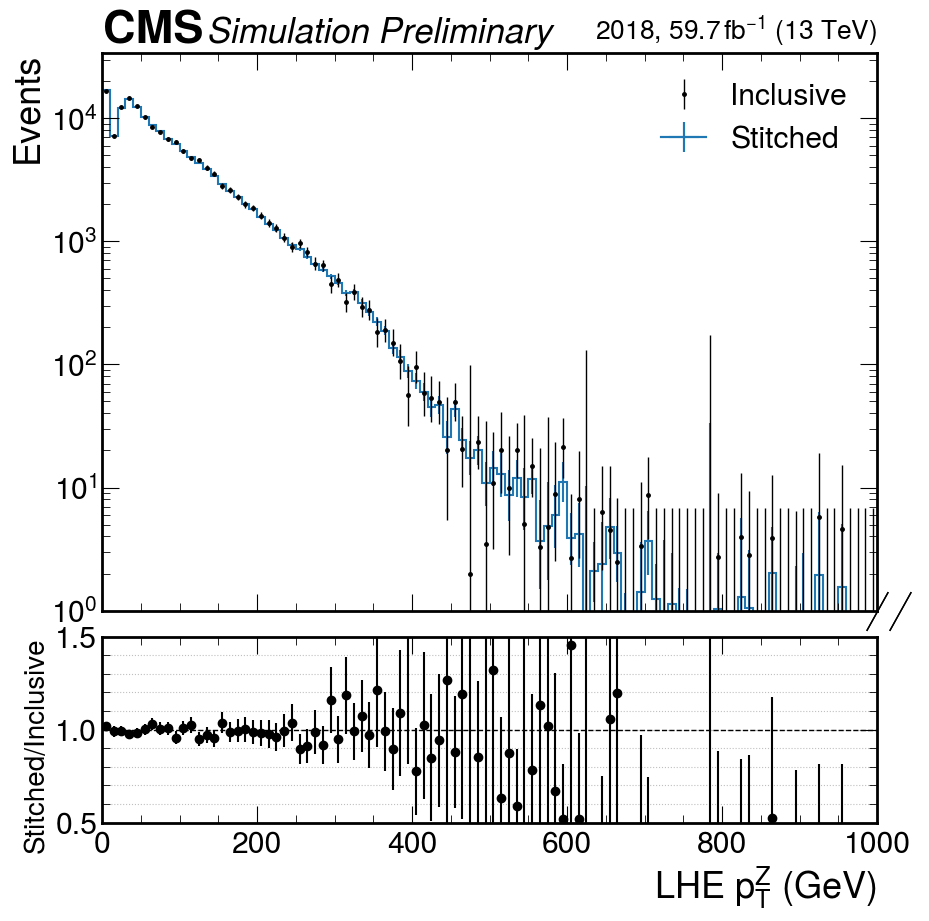

In [67]:
plot_ratio(folder_stitched="/grid_mnt/data__data.polcms/cms/vernazza/cmt/FeaturePlot/ul_2018_ZZ_v12/cat_base/prod_240321", folder_notStitched="/grid_mnt/data__data.polcms/cms/vernazza/cmt/FeaturePlot/ul_2018_ZZ_v12/cat_base/prod_240320")
plt.savefig("/data_CMS/cms/vernazza/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/DYStitching/DY_2018.pdf", bbox_inches="tight")

/tmp/ipykernel_136589/85766471.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap('viridis', 12)
/tmp/ipykernel_136589/85766471.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = cm.get_cmap('plasma', 7)


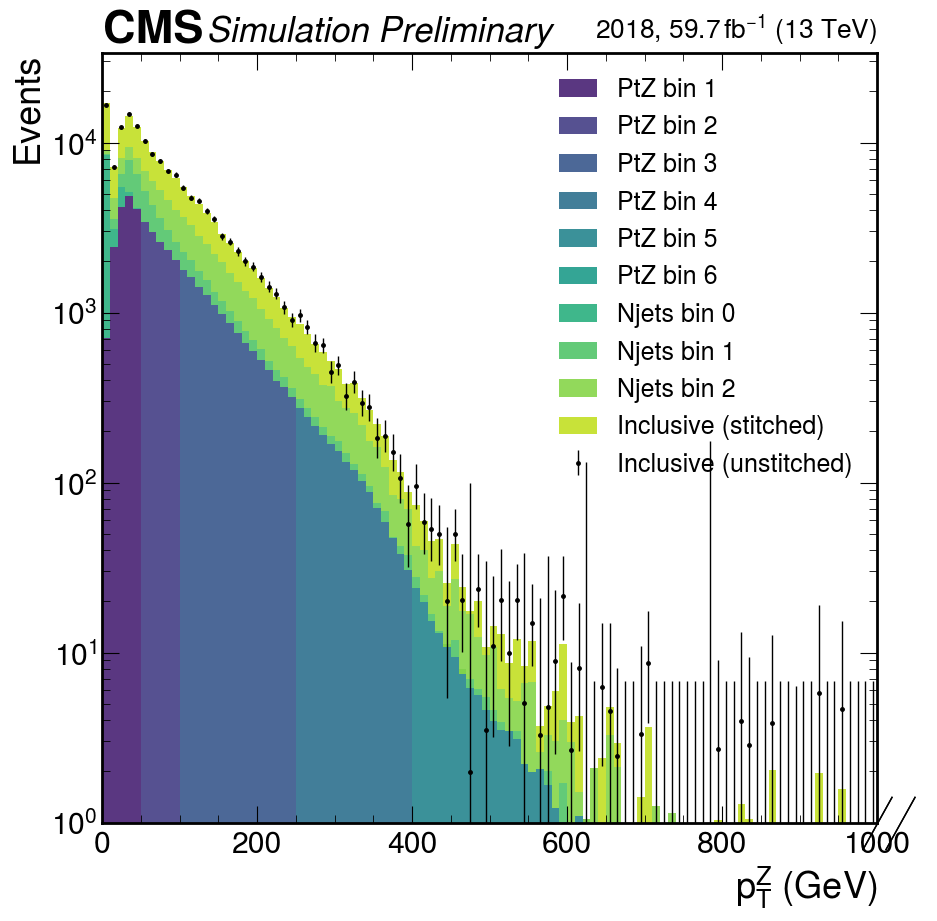

In [101]:
def plot_detailed(folder_stitched, folder_notStitched, suffix=""):
    dir_stitched = uproot.open(f"{folder_stitched}/root/LHE_Vpt__os_iso__pg_dy_split__nodata.root:histograms")
    dir_incl = uproot.open(f"{folder_notStitched}/root/LHE_Vpt__os_iso__pg_dy_split__nodata.root:histograms")
    
    fig, main_ax = plt.subplots()

    from matplotlib import cm
    cmap1 = cm.get_cmap('viridis', 12)
    cmap2 = cm.get_cmap('plasma', 7)
    hep.histplot([dir_stitched[name] for name in ptz_names] + [dir_stitched[name] for name in njets_names] + [dir_stitched["dy_incl"]], yerr=False,
                 label=[f"PtZ bin {bin}" for bin in range(1, 7)] + [f"Njets bin {bin}" for bin in range(0, 3)] + ["Inclusive (stitched)"],  ax=main_ax, stack=True,
                 histtype='fill', alpha=0.9, color=cmap1(range(1, 11)))
    # njets_binned_artists = hep.histplot([dir_stitched[name] for name in njets_names], yerr=True, label=[f"Njets bin {bin}" for bin in range(1, 9)], flow="none", ax=main_ax)
    # ptz_binned_artists = hep.histplot([dir_stitched[name] for name in ptz_names], yerr=True, label=[f"PtZ bin {bin}" for bin in range(1, 9)], flow="none", ax=main_ax)
    incl_artists = hep.histplot(dir_incl["dy_incl"], label="Inclusive (unstitched)", yerr=True, histtype="errorbar", color="black", markersize=5, ax=main_ax)

    main_ax.set_yscale("log")
    main_ax.set_ylim(bottom=1)
    if suffix == "":
        plt.xlim(0, 1e3)
    main_ax.legend(fontsize=18)
    #main_ax.legend(incl_artists + ht_binned_artists, ["Inclusive"] + [f"HT bin {bin}" for bin in range(1, 9)])
    main_ax.set_xlabel("$p_T^Z$ (GeV)")
    main_ax.set_ylabel("Events")
    hep.cms.text("Simulation Preliminary", fontsize=25, ax=main_ax)
    lumi = 59741
    hep.cms.lumitext(f"2018, ${lumi/ 1000:.1f}\/""fb^{-1}$ (13 TeV)", fontsize=20, ax=main_ax)

plot_detailed(folder_stitched="/grid_mnt/data__data.polcms/cms/vernazza/cmt/FeaturePlot/ul_2018_ZZ_v12/cat_base/prod_240321", folder_notStitched="/grid_mnt/data__data.polcms/cms/vernazza/cmt/FeaturePlot/ul_2018_ZZ_v12/cat_base/prod_240320")
plt.savefig("/data_CMS/cms/vernazza/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/DYStitching/DY_2018_detailed.pdf", bbox_inches="tight")